# SVM

## Relevant imports, read data

In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.cross_validation import StratifiedShuffleSplit

from sklearn.svm import SVC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# read data that resulted from feature selection and preparation step. 
X_train = pd.read_table('X_train_reduced.csv', sep=',', header=0)

# read in Y_train
Y_train = pd.read_table('Y_train.csv', sep=',', header=0)
Y_train = Y_train['TARGET']  # to get a 1d array for the random forest algorithm later on.

In [11]:
# normalize features to give them all equal importance and calculate principal components
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)

## Model train

In [18]:
# TRAIN 
# probability = True ; needs probability for decision_function in prediction 
# class_weight = balanced; to weight the unsatisfied customers inversely proporational to the satisfied ones
clf = SVC(cache_size=7000, kernel='rbf', probability=True) 
clf.fit(X_train_scaled, Y_train)

SVC(C=1.0, cache_size=7000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Predict

In [19]:
# read data that resulted from feature selection and preparation step. 
X_valid = pd.read_table('X_valid_reduced.csv', sep=',', header=0)

# read in Y_train
Y_valid = pd.read_table('Y_valid.csv', sep=',', header=0)
Y_valid = Y_valid['TARGET']  # to get a 1d array for the random forest algorithm later on.

In [20]:
# normalize features to give them all equal importance and calculate principal components
X_valid_scaled = standard_scaler.transform(X_valid)

In [25]:
# PREDICT
pred_labels = clf.predict(X_valid_scaled)
pred_proba = clf.decision_function(X_valid_scaled)

## Evaluate

In [22]:
pred_score = clf.score(X_valid_scaled, Y_valid)
print('... prediction score: {0:0.2f}%'.format(pred_score * 100))
print('')

print(confusion_matrix(Y_valid, pred_labels))

... prediction score: 96.04%

[[14602     0]
 [  602     0]]


## ROC / AUC curve

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from matplotlib import pyplot as plt
%matplotlib inline

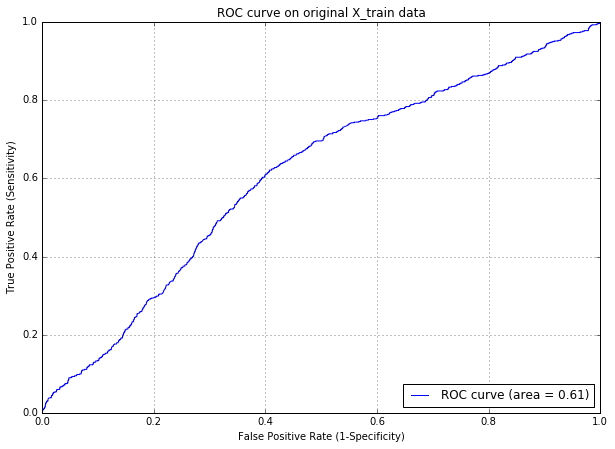

In [27]:
# calculate the false positive and true positive rates. 
# calculate the auc score

fpr, tpr, thresholds = roc_curve(Y_valid, pred_proba)
auc_score = roc_auc_score(Y_valid, pred_proba) 


# plot the roc curve
fig = plt.figure(figsize=(10,7))
fig.add_subplot(1,1,1)    
    
plt.plot(fpr, tpr, label='ROC curve (area = {0:0.2f})'.format(auc_score))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve on original X_train data')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend(loc='lower right')
print('')